## Installing dependencies. Useful for running on Google Colab

In [ ]:
# pyarrow might be needed to read the data
!python -m pip install Cython
!python -m pip install -e git+https://git@github.com/alercebroker/turbo-fats#egg=turbofats
!python -m pip install -e git+https://git@github.com/alercebroker/mhps#egg=mhps
!python -m pip install -e git+https://git@github.com/alercebroker/P4J#egg=P4J
!python -m pip install pyarrow
!python -m pip install -e git+https://git@github.com/alercebroker/lc_classifier#egg=lc_classifier

## [Google Colab] Please restart Python after installing the packages:
### Runtime >> Restart runtime

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from lc_classifier.utils import LightcurveBuilder

# Build a synthetic lightcurve

LightcurveBuilder is an auxiliary object that helps you building a Pandas dataframe that is compatible with our library. With LightcurveBuilder you can add as many bands (filters) as you have.

In the following example we will build a synthetic sinusoidal lightcurve that was observed in three bands: u, g and r.

In [2]:
bands = ['u', 'g', 'r']
true_period = 0.37
lightcurve_builder = LightcurveBuilder('lc_001')
for band in bands:
    n_obs_band = np.random.randint(15, 30)
    time = np.random.rand(n_obs_band) * 700
    magnitude = 17.0 + 0.3 * np.sin(time*2*np.pi/true_period)
    error = np.random.randn(n_obs_band) ** 2 * 0.3 + 0.05
    error = np.clip(error, 0.0, 0.4)
    magnitude += np.random.randn(n_obs_band) * error

    lightcurve_builder.add_band(
        band,
        time,
        magnitude,
        error)

lightcurve = lightcurve_builder.build_dataframe()
lightcurve

,time,magnitude,error,band
oid,,,,
lc_001,80.454599,16.165950,0.400000,u
lc_001,476.660437,17.333364,0.068642,u
lc_001,600.322576,16.760416,0.400000,u
lc_001,562.087049,17.160127,0.217162,u
lc_001,110.298393,17.342266,0.098855,u
lc_001,191.304224,16.908351,0.277300,u
lc_001,448.850091,17.545847,0.241756,u
lc_001,632.873746,17.274330,0.316908,u
lc_001,47.506977,17.167779,0.144941,u


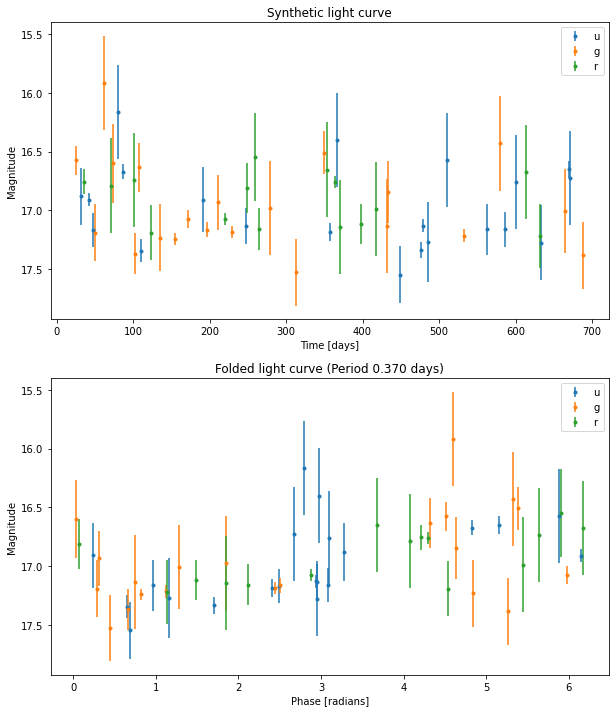

In [3]:
fig = plt.figure(figsize=(10, 12))
fig.set_facecolor('white')

plt.subplot(2, 1, 1)
for band in bands:
    obs_in_band = lightcurve[lightcurve.band == band]
    plt.errorbar(
        obs_in_band.time,
        obs_in_band.magnitude,
        yerr=obs_in_band.error,
        fmt='.',
        label=band
    )

plt.xlabel('Time [days]')
plt.ylabel('Magnitude')
plt.title('Synthetic light curve')
plt.legend()
plt.gca().invert_yaxis()

plt.subplot(2, 1, 2)
for band in bands:
    obs_in_band = lightcurve[lightcurve.band == band]
    plt.errorbar(
        (obs_in_band.time % true_period) / true_period * 2 * np.pi,
        obs_in_band.magnitude,
        yerr=obs_in_band.error,
        fmt='.',
        label=band
    )

plt.xlabel('Phase [radians]')
plt.ylabel('Magnitude')
plt.title(f'Folded light curve (Period {true_period:.3f} days)')
plt.legend()
plt.gca().invert_yaxis()

plt.show()

# Compute features from lightcurve

Our library has many available feature extractors inside the features module. You can combine them using a FeatureExtractorComposer object.

In [4]:
from lc_classifier.features import MHPSExtractor, PeriodExtractor, GPDRWExtractor
from lc_classifier.features import FoldedKimExtractor
from lc_classifier.features import HarmonicsExtractor, IQRExtractor
from lc_classifier.features import PowerRateExtractor
from lc_classifier.features import TurboFatsFeatureExtractor

from lc_classifier.features import FeatureExtractorComposer

In [5]:
feature_extractor = FeatureExtractorComposer(
    [
        MHPSExtractor(bands),
        PeriodExtractor(bands),
        GPDRWExtractor(bands),
        FoldedKimExtractor(bands),
        HarmonicsExtractor(bands),
        IQRExtractor(bands),
        PowerRateExtractor(bands),
        TurboFatsFeatureExtractor(bands)
    ]
)

To compute the features we give the dataframe with observations to the compute_features method of our feature extractor. The features appear as columns and the different objects as rows.

In [6]:
features = feature_extractor.compute_features(lightcurve)
features

,MHPS_ratio_u,MHPS_low_u,MHPS_high_u,MHPS_non_zero_u,MHPS_PN_flag_u,MHPS_ratio_g,MHPS_low_g,MHPS_high_g,MHPS_non_zero_g,MHPS_PN_flag_g,...,Skew_r,SmallKurtosis_r,Std_r,StetsonK_r,Pvar_r,ExcessVar_r,SF_ML_amplitude_r,SF_ML_gamma_r,IAR_phi_r,LinearTrend_r
oid,,,,,,,,,,,,,,,,,,,,,
lc_001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.034581,-1.285654,0.219406,0.797083,0.990859,-0.000147,0.051016,-0.431445,0.003119,0.000228


Let's check if the computed period is similar to the true period that we used to build our synthetic light curve.

In [7]:
period_feature_names = [f for f in features.columns if 'period' in f.lower()]
features[period_feature_names]

,Multiband_period,Period_band_u,delta_period_u,Period_band_g,delta_period_g,Period_band_r,delta_period_r
oid,,,,,,,
lc_001,0.37001,0.057451,0.312559,0.078536,0.291474,0.050836,0.319173


## Let's calculate features for many lightcurves with different periods

In [8]:
bands = ['u', 'g', 'r']

n_curves = 100
true_periods = np.logspace(-1, 2.5, n_curves)
lightcurves = []
for i in range(n_curves):
    true_period = true_periods[i]
    lightcurve_builder = LightcurveBuilder(f'lc_{i:04}')
    for band in bands:
        n_obs_band = np.random.randint(15, 30)
        time = np.random.rand(n_obs_band) * 700
        magnitude = 17.0 + 0.3 * np.sin(time*2*np.pi/true_period)
        error = np.random.randn(n_obs_band) ** 2 * 0.3 + 0.05
        error = np.clip(error, 0.0, 0.4)
        magnitude += np.random.randn(n_obs_band) * error

        lightcurve_builder.add_band(
            band,
            time,
            magnitude,
            error)

    lightcurve = lightcurve_builder.build_dataframe()
    lightcurves.append(lightcurve)
lightcurves = pd.concat(lightcurves)
lightcurves

,time,magnitude,error,band
oid,,,,
lc_0000,17.854926,16.965844,0.057217,u
lc_0000,675.986989,16.481068,0.354713,u
lc_0000,358.340726,17.384741,0.286468,u
lc_0000,464.519158,17.143928,0.190731,u
lc_0000,19.570207,16.729135,0.050781,u
...,...,...,...,...
lc_0099,585.622815,16.690523,0.079779,r
lc_0099,48.969746,17.355705,0.067103,r
lc_0099,496.784834,16.734526,0.100413,r


In [9]:
features = feature_extractor.compute_features(lightcurves)
features

,MHPS_ratio_u,MHPS_low_u,MHPS_high_u,MHPS_non_zero_u,MHPS_PN_flag_u,MHPS_ratio_g,MHPS_low_g,MHPS_high_g,MHPS_non_zero_g,MHPS_PN_flag_g,...,Skew_r,SmallKurtosis_r,Std_r,StetsonK_r,Pvar_r,ExcessVar_r,SF_ML_amplitude_r,SF_ML_gamma_r,IAR_phi_r,LinearTrend_r
oid,,,,,,,,,,,,,,,,,,,,,
lc_0000,3.088313e+02,4.821274,1.561135e-02,4.0,1.0,2.263728,1.201035,0.530556,8.0,0.0,...,-0.305816,0.094054,0.330885,0.855330,0.889504,-0.000064,0.160573,-0.128000,4.230063e-13,-0.000524
lc_0001,1.593052e+01,1.635305,1.026523e-01,9.0,0.0,8.363720,1.543168,0.184507,6.0,0.0,...,-0.440304,2.378736,0.275767,0.741049,0.932360,0.000005,0.196364,-0.144186,2.299775e-02,0.000520
lc_0002,9.250455e+10,1.439018,1.555619e-11,1.0,1.0,24290.570312,1.131789,0.000047,1.0,1.0,...,0.428114,-0.659562,0.367710,0.813296,1.000000,0.000143,0.290818,-0.103497,9.175136e-01,0.000457
lc_0003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.104465,1.161955,0.378150,0.750539,0.997150,0.000126,0.146944,-0.367513,6.418697e-04,0.001088
lc_0004,NaN,NaN,NaN,NaN,NaN,4.343453,1.112061,0.256031,5.0,0.0,...,-0.570752,-0.245291,0.349239,0.751759,1.000000,0.000181,0.267819,-0.111160,5.718562e-01,-0.000398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lc_0095,NaN,NaN,NaN,NaN,NaN,388.451691,2.568830,0.006613,5.0,1.0,...,0.561555,0.088091,0.296778,0.768912,1.000000,0.000095,0.283814,0.040390,1.436733e-02,-0.000091
lc_0096,2.125019e+01,0.242591,1.141592e-02,4.0,0.0,33811.347656,2.267217,0.000067,1.0,1.0,...,0.498041,2.738058,0.346984,0.753125,1.000000,0.000252,0.482292,0.164420,9.752437e-01,-0.000882
lc_0097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.260945,4.080271,0.327142,0.767252,1.000000,0.000121,0.852052,0.565180,4.230063e-13,-0.000626


In [10]:
computed_periods = features['Multiband_period']
computed_periods

oid
lc_0000      0.099999
lc_0001      0.108482
lc_0002      0.117682
lc_0003      0.127661
lc_0004      0.138488
              ...    
lc_0095    228.915657
lc_0096    249.999988
lc_0097    267.605628
lc_0098    296.874985
lc_0099    327.586202
Name: Multiband_period, Length: 100, dtype: float64

Text(0, 0.5, 'Computed period')

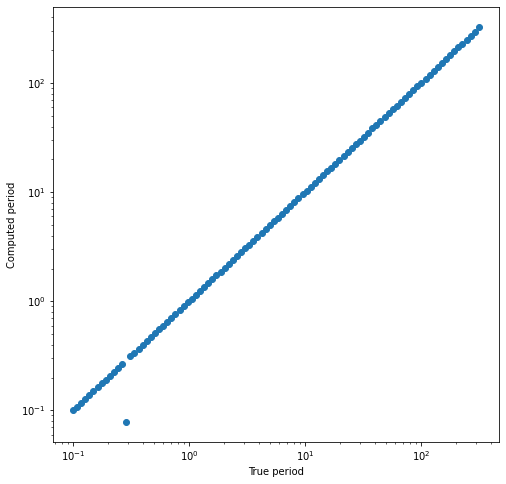

In [11]:
fig = plt.figure(figsize=(8, 8))
fig.set_facecolor('white')

plt.scatter(true_periods, computed_periods)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')

plt.xlabel('True period')
plt.ylabel('Computed period')